In [1]:
import numpy as np
from keras.layers import LSTM
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Flatten, Dropout, Activation, Lambda, Permute, Reshape
from numpy import load
from keras import losses
import json
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.callbacks import Callback, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, accuracy_score
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import scikitplot as skplt

Using TensorFlow backend.
C:\Users\Om\Anaconda3\envs\opencv\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Om\Anaconda3\envs\opencv\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Om\Anaconda3\envs\opencv\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Om\Anaconda3\envs\opencv\lib\site-packages\t

In [2]:
def concatenator():
    training_set=[]
    for i in range(1,7):
        if i==3:
            continue
        X=np.load('F0'+str(i)+'.npy')
        if i==1:
            training_set=X
        else:
            training_set=np.concatenate((training_set,X))
        #training_set=training_set.reshape(350,20,2622)
        print(training_set.shape)
    return training_set

def oversample(dataset,wordID):
    pos_over_pos=dataset[10*wordID:10*(wordID+1),:,:]
    over_sample=[]
    for i in range(10):
        if i == 0:
            over_sample=pos_over_pos
        else:
            over_sample=np.concatenate((over_sample,pos_over_pos))
        
    
    X_data_over_sample=np.concatenate((dataset,over_sample))
    
    return X_data_over_sample

def labeller(wordID):  
    Y_train=np.zeros((350,1))
    Y_train[wordID*10:(wordID+1)*10]=1
    Y_data_oversample=np.concatenate((Y_train,np.ones((100,1))))
    return Y_data_oversample

def concatenator_t():
    training_set=[]
    for i in range(1,12):
        if i==3:
            continue
        if i<10:
            X=np.load('F0'+str(i)+'_t.npy')
        if i==10:
            X=np.load('F'+str(i)+'_t.npy')
        if i==1:
            training_set=X
        else:
            training_set=np.concatenate((training_set,X))
        print(training_set.shape)
    return training_set

def trainer(X_train, y_train):

    model = Sequential()

    input_shape=(X_train.shape[1],X_train.shape[2])

    model.add(LSTM(units=11,return_sequences=True,input_shape=input_shape))
    model.add(Dropout(0.2))

    model.add(LSTM(units=16,return_sequences=True))
    model.add(Dropout(0.2))


    model.add(LSTM(units=16,return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(units=16,input_shape=input_shape)) 
    model.add(Dropout(0.2))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer='adam', loss="binary_crossentropy",metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=60,batch_size=75,validation_split=0.2)
    
    #print(history.history['val_acc'])
    #print(history.history['val_loss'])
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'val'], loc='upper left')
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'val'], loc='upper left')
    plt.show()

    return model

(1400, 2622)
(2800, 2622)
(4200, 2622)
(5600, 2622)
(7000, 2622)
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 324 samples, validate on 81 samples
Epoch 1/60
324/324 [==============================] - 4s 13ms/step - loss: 0.6881 - accuracy: 0.6790 - val_loss: 0.6732 - val_accuracy: 0.8148
Epoch 2/60
324/324 [==============================] - 1s 2ms/step - loss: 0.6692 - accuracy: 0.7531 - val_loss: 0.6415 - val_accuracy: 0.8148
Epoch 3/60
324/324 [==============================] - 1s 2ms/step - loss: 0.6419 - accuracy: 0.7531 - val_loss: 0.5877 - val_accuracy: 0.8148
Epoch 4/60
324/324 [==============================] - 1s 3ms/step - loss: 0.5936 - accuracy: 0.7531 - val_loss: 0.5132 - val_accuracy: 0.8148
Epoch 5/60
324/324 [==============================] - 1s 3ms/step - loss: 0.5433 - accuracy: 0.7531 - val_loss: 0.4562 - val_accuracy: 0.8148
Epoch 6/60
324/324 [==============================] - 1s 3m

324/324 [==============================] - 1s 3ms/step - loss: 0.0619 - accuracy: 0.9815 - val_loss: 0.0773 - val_accuracy: 0.9753
Epoch 54/60
324/324 [==============================] - 1s 3ms/step - loss: 0.0671 - accuracy: 0.9784 - val_loss: 0.0614 - val_accuracy: 0.9753
Epoch 55/60
324/324 [==============================] - 1s 3ms/step - loss: 0.1169 - accuracy: 0.9630 - val_loss: 0.0762 - val_accuracy: 0.9753
Epoch 56/60
324/324 [==============================] - 1s 3ms/step - loss: 0.0808 - accuracy: 0.9753 - val_loss: 0.1222 - val_accuracy: 0.9506
Epoch 57/60
324/324 [==============================] - 1s 3ms/step - loss: 0.1212 - accuracy: 0.9568 - val_loss: 0.1171 - val_accuracy: 0.9506
Epoch 58/60
324/324 [==============================] - 1s 3ms/step - loss: 0.0875 - accuracy: 0.9660 - val_loss: 0.0682 - val_accuracy: 0.9753
Epoch 59/60
324/324 [==============================] - 1s 3ms/step - loss: 0.0607 - accuracy: 0.9846 - val_loss: 0.0668 - val_accuracy: 0.9630
Epoch 60/60

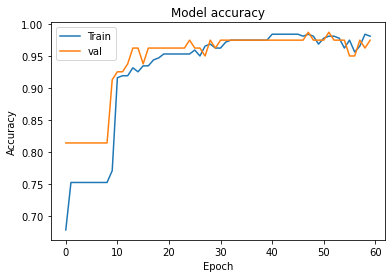

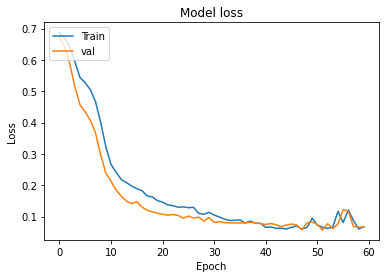

(600, 2622)
(1200, 2622)
(1800, 2622)
(2400, 2622)
(3000, 2622)
(3600, 2622)
(4200, 2622)
(4800, 2622)
(5400, 2622)
(6000, 2622)
(1400, 2622)
(2800, 2622)
(4200, 2622)
(5600, 2622)
(7000, 2622)
Train on 324 samples, validate on 81 samples
Epoch 1/60
324/324 [==============================] - 4s 13ms/step - loss: 0.6884 - accuracy: 0.6975 - val_loss: 0.6737 - val_accuracy: 0.8148
Epoch 2/60
324/324 [==============================] - 1s 2ms/step - loss: 0.6686 - accuracy: 0.7500 - val_loss: 0.6431 - val_accuracy: 0.8148
Epoch 3/60
324/324 [==============================] - 1s 3ms/step - loss: 0.6416 - accuracy: 0.7500 - val_loss: 0.5932 - val_accuracy: 0.8148
Epoch 4/60
324/324 [==============================] - 1s 3ms/step - loss: 0.6013 - accuracy: 0.7500 - val_loss: 0.5215 - val_accuracy: 0.8148
Epoch 5/60
324/324 [==============================] - 1s 3ms/step - loss: 0.5449 - accuracy: 0.7500 - val_loss: 0.4558 - val_accuracy: 0.8148
Epoch 6/60
324/324 [==============================

Epoch 57/60
324/324 [==============================] - 1s 3ms/step - loss: 0.0652 - accuracy: 0.9722 - val_loss: 0.0165 - val_accuracy: 1.0000
Epoch 58/60
324/324 [==============================] - 1s 2ms/step - loss: 0.0689 - accuracy: 0.9784 - val_loss: 0.0711 - val_accuracy: 0.9753
Epoch 59/60
324/324 [==============================] - 1s 3ms/step - loss: 0.0925 - accuracy: 0.9691 - val_loss: 0.0762 - val_accuracy: 0.9753
Epoch 60/60
324/324 [==============================] - 1s 3ms/step - loss: 0.0944 - accuracy: 0.9691 - val_loss: 0.0707 - val_accuracy: 0.9753


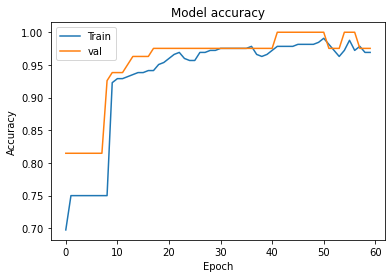

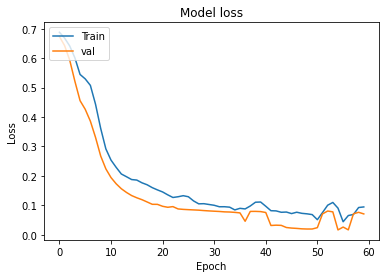

(600, 2622)
(1200, 2622)
(1800, 2622)
(2400, 2622)
(3000, 2622)
(3600, 2622)
(4200, 2622)
(4800, 2622)
(5400, 2622)
(6000, 2622)
(1400, 2622)
(2800, 2622)
(4200, 2622)
(5600, 2622)
(7000, 2622)
Train on 324 samples, validate on 81 samples
Epoch 1/60
324/324 [==============================] - 4s 13ms/step - loss: 0.6869 - accuracy: 0.6883 - val_loss: 0.6702 - val_accuracy: 0.8025
Epoch 2/60
324/324 [==============================] - 1s 2ms/step - loss: 0.6646 - accuracy: 0.7531 - val_loss: 0.6340 - val_accuracy: 0.8025
Epoch 3/60
324/324 [==============================] - 1s 3ms/step - loss: 0.6296 - accuracy: 0.7531 - val_loss: 0.5746 - val_accuracy: 0.8025
Epoch 4/60
324/324 [==============================] - 1s 3ms/step - loss: 0.5709 - accuracy: 0.7531 - val_loss: 0.4910 - val_accuracy: 0.8025
Epoch 5/60
324/324 [==============================] - 1s 2ms/step - loss: 0.5165 - accuracy: 0.7531 - val_loss: 0.4309 - val_accuracy: 0.8025
Epoch 6/60
324/324 [==============================

324/324 [==============================] - 1s 3ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 57/60
324/324 [==============================] - 1s 3ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 58/60
324/324 [==============================] - 1s 2ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 59/60
324/324 [==============================] - 1s 2ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 60/60
324/324 [==============================] - 1s 2ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.0032 - val_accuracy: 1.0000


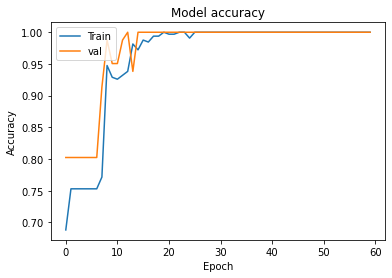

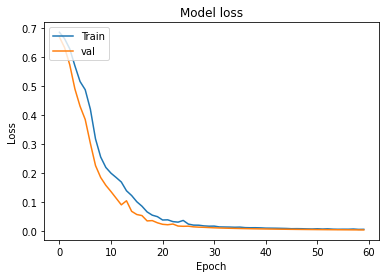

(600, 2622)
(1200, 2622)
(1800, 2622)
(2400, 2622)
(3000, 2622)
(3600, 2622)
(4200, 2622)
(4800, 2622)
(5400, 2622)
(6000, 2622)
(1400, 2622)
(2800, 2622)
(4200, 2622)
(5600, 2622)
(7000, 2622)
Train on 324 samples, validate on 81 samples
Epoch 1/60
324/324 [==============================] - 4s 14ms/step - loss: 0.6891 - accuracy: 0.6698 - val_loss: 0.6770 - val_accuracy: 0.8148
Epoch 2/60
324/324 [==============================] - 1s 2ms/step - loss: 0.6748 - accuracy: 0.7562 - val_loss: 0.6533 - val_accuracy: 0.8148
Epoch 3/60
324/324 [==============================] - 1s 2ms/step - loss: 0.6527 - accuracy: 0.7562 - val_loss: 0.6157 - val_accuracy: 0.8148
Epoch 4/60
324/324 [==============================] - 1s 3ms/step - loss: 0.6158 - accuracy: 0.7562 - val_loss: 0.5550 - val_accuracy: 0.8148
Epoch 5/60
324/324 [==============================] - 1s 3ms/step - loss: 0.5713 - accuracy: 0.7562 - val_loss: 0.4795 - val_accuracy: 0.8148
Epoch 6/60
324/324 [==============================

Epoch 57/60
324/324 [==============================] - 1s 3ms/step - loss: 0.0381 - accuracy: 0.9907 - val_loss: 0.0437 - val_accuracy: 0.9877
Epoch 58/60
324/324 [==============================] - 1s 2ms/step - loss: 0.0405 - accuracy: 0.9907 - val_loss: 0.0148 - val_accuracy: 1.0000
Epoch 59/60
324/324 [==============================] - 1s 2ms/step - loss: 0.0406 - accuracy: 0.9938 - val_loss: 0.0213 - val_accuracy: 0.9877
Epoch 60/60
324/324 [==============================] - 1s 2ms/step - loss: 0.0290 - accuracy: 0.9969 - val_loss: 0.0120 - val_accuracy: 1.0000


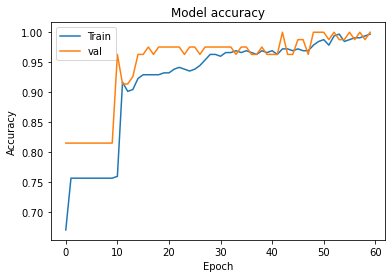

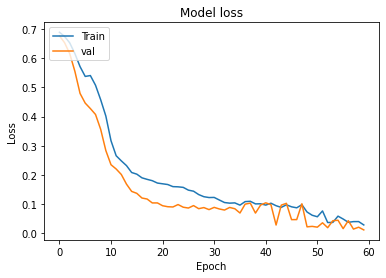

(600, 2622)
(1200, 2622)
(1800, 2622)
(2400, 2622)
(3000, 2622)
(3600, 2622)
(4200, 2622)
(4800, 2622)
(5400, 2622)
(6000, 2622)
(1400, 2622)
(2800, 2622)
(4200, 2622)
(5600, 2622)
(7000, 2622)
Train on 324 samples, validate on 81 samples
Epoch 1/60
324/324 [==============================] - 5s 15ms/step - loss: 0.6883 - accuracy: 0.6790 - val_loss: 0.6758 - val_accuracy: 0.7901
Epoch 2/60
324/324 [==============================] - 1s 2ms/step - loss: 0.6705 - accuracy: 0.7562 - val_loss: 0.6495 - val_accuracy: 0.7901
Epoch 3/60
324/324 [==============================] - 1s 3ms/step - loss: 0.6433 - accuracy: 0.7562 - val_loss: 0.6070 - val_accuracy: 0.7901
Epoch 4/60
324/324 [==============================] - 1s 2ms/step - loss: 0.6026 - accuracy: 0.7562 - val_loss: 0.5455 - val_accuracy: 0.7901
Epoch 5/60
324/324 [==============================] - 1s 2ms/step - loss: 0.5528 - accuracy: 0.7562 - val_loss: 0.4948 - val_accuracy: 0.7901
Epoch 6/60
324/324 [==============================

324/324 [==============================] - 1s 2ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 0.0054 - val_accuracy: 1.0000
Epoch 57/60
324/324 [==============================] - 1s 2ms/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.0052 - val_accuracy: 1.0000
Epoch 58/60
324/324 [==============================] - 0s 1ms/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 0.0050 - val_accuracy: 1.0000
Epoch 59/60
324/324 [==============================] - 0s 1ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 60/60
324/324 [==============================] - 0s 2ms/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.0046 - val_accuracy: 1.0000


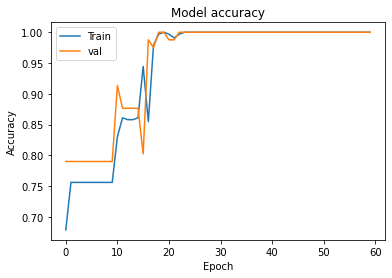

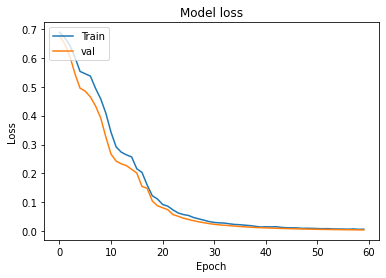

(600, 2622)
(1200, 2622)
(1800, 2622)
(2400, 2622)
(3000, 2622)
(3600, 2622)
(4200, 2622)
(4800, 2622)
(5400, 2622)
(6000, 2622)
(1400, 2622)
(2800, 2622)
(4200, 2622)
(5600, 2622)
(7000, 2622)
Train on 324 samples, validate on 81 samples
Epoch 1/60
324/324 [==============================] - 5s 15ms/step - loss: 0.6880 - accuracy: 0.7099 - val_loss: 0.6741 - val_accuracy: 0.7654
Epoch 2/60
324/324 [==============================] - 1s 2ms/step - loss: 0.6654 - accuracy: 0.7654 - val_loss: 0.6421 - val_accuracy: 0.7654
Epoch 3/60
324/324 [==============================] - 1s 2ms/step - loss: 0.6278 - accuracy: 0.7654 - val_loss: 0.5895 - val_accuracy: 0.7654
Epoch 4/60
324/324 [==============================] - 1s 2ms/step - loss: 0.5703 - accuracy: 0.7654 - val_loss: 0.5271 - val_accuracy: 0.7654
Epoch 5/60
324/324 [==============================] - 1s 3ms/step - loss: 0.5270 - accuracy: 0.7654 - val_loss: 0.5020 - val_accuracy: 0.7654
Epoch 6/60
324/324 [==============================

Epoch 57/60
324/324 [==============================] - 1s 3ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 58/60
324/324 [==============================] - 0s 1ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 59/60
324/324 [==============================] - 1s 2ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 60/60
324/324 [==============================] - 1s 3ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0026 - val_accuracy: 1.0000


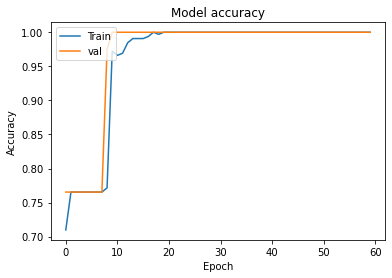

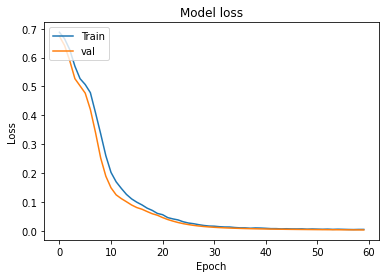

(600, 2622)
(1200, 2622)
(1800, 2622)
(2400, 2622)
(3000, 2622)
(3600, 2622)
(4200, 2622)
(4800, 2622)
(5400, 2622)
(6000, 2622)
(1400, 2622)
(2800, 2622)
(4200, 2622)
(5600, 2622)
(7000, 2622)
Train on 324 samples, validate on 81 samples
Epoch 1/60
324/324 [==============================] - 5s 16ms/step - loss: 0.6879 - accuracy: 0.7006 - val_loss: 0.6684 - val_accuracy: 0.8272
Epoch 2/60
324/324 [==============================] - 1s 2ms/step - loss: 0.6667 - accuracy: 0.7469 - val_loss: 0.6312 - val_accuracy: 0.8272
Epoch 3/60
324/324 [==============================] - 1s 3ms/step - loss: 0.6334 - accuracy: 0.7469 - val_loss: 0.5735 - val_accuracy: 0.8272
Epoch 4/60
324/324 [==============================] - 1s 3ms/step - loss: 0.5962 - accuracy: 0.7469 - val_loss: 0.4996 - val_accuracy: 0.8272
Epoch 5/60
324/324 [==============================] - 1s 4ms/step - loss: 0.5527 - accuracy: 0.7469 - val_loss: 0.4516 - val_accuracy: 0.8272
Epoch 6/60
324/324 [==============================

Epoch 57/60
324/324 [==============================] - 1s 2ms/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 0.0081 - val_accuracy: 1.0000
Epoch 58/60
324/324 [==============================] - 1s 2ms/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.0092 - val_accuracy: 1.0000
Epoch 59/60
324/324 [==============================] - 1s 2ms/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 0.0108 - val_accuracy: 1.0000
Epoch 60/60
324/324 [==============================] - 1s 2ms/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.0123 - val_accuracy: 1.0000


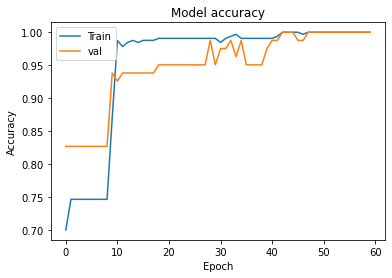

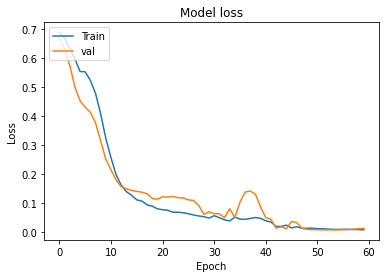

(600, 2622)
(1200, 2622)
(1800, 2622)
(2400, 2622)
(3000, 2622)
(3600, 2622)
(4200, 2622)
(4800, 2622)
(5400, 2622)
(6000, 2622)
(1400, 2622)
(2800, 2622)
(4200, 2622)
(5600, 2622)
(7000, 2622)
Train on 324 samples, validate on 81 samples
Epoch 1/60
324/324 [==============================] - 5s 17ms/step - loss: 0.6865 - accuracy: 0.6574 - val_loss: 0.6692 - val_accuracy: 0.8148
Epoch 2/60
324/324 [==============================] - 1s 3ms/step - loss: 0.6643 - accuracy: 0.7716 - val_loss: 0.6346 - val_accuracy: 0.8148
Epoch 3/60
324/324 [==============================] - 1s 4ms/step - loss: 0.6321 - accuracy: 0.7716 - val_loss: 0.5829 - val_accuracy: 0.8148
Epoch 4/60
324/324 [==============================] - 1s 4ms/step - loss: 0.5816 - accuracy: 0.7716 - val_loss: 0.5123 - val_accuracy: 0.8148
Epoch 5/60
324/324 [==============================] - 1s 2ms/step - loss: 0.5321 - accuracy: 0.7716 - val_loss: 0.4582 - val_accuracy: 0.8148
Epoch 6/60
324/324 [==============================

324/324 [==============================] - 1s 4ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0228 - val_accuracy: 1.0000
Epoch 57/60
324/324 [==============================] - 1s 3ms/step - loss: 0.0102 - accuracy: 1.0000 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 58/60
324/324 [==============================] - 1s 4ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 59/60
324/324 [==============================] - 1s 4ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 60/60
324/324 [==============================] - 1s 4ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 1.0000


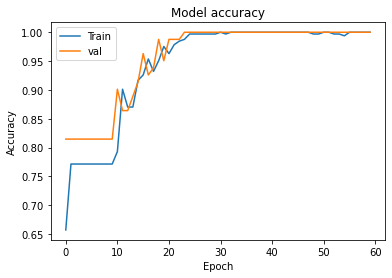

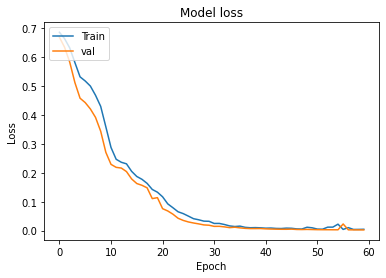

(600, 2622)
(1200, 2622)
(1800, 2622)
(2400, 2622)
(3000, 2622)
(3600, 2622)
(4200, 2622)
(4800, 2622)
(5400, 2622)
(6000, 2622)
(1400, 2622)
(2800, 2622)
(4200, 2622)
(5600, 2622)
(7000, 2622)
Train on 324 samples, validate on 81 samples
Epoch 1/60
324/324 [==============================] - 6s 18ms/step - loss: 0.6900 - accuracy: 0.7068 - val_loss: 0.6826 - val_accuracy: 0.7901
Epoch 2/60
324/324 [==============================] - 1s 2ms/step - loss: 0.6799 - accuracy: 0.7562 - val_loss: 0.6669 - val_accuracy: 0.7901
Epoch 3/60
324/324 [==============================] - 1s 2ms/step - loss: 0.6630 - accuracy: 0.7562 - val_loss: 0.6412 - val_accuracy: 0.7901
Epoch 4/60
324/324 [==============================] - 1s 3ms/step - loss: 0.6347 - accuracy: 0.7562 - val_loss: 0.5958 - val_accuracy: 0.7901
Epoch 5/60
324/324 [==============================] - 1s 3ms/step - loss: 0.5928 - accuracy: 0.7562 - val_loss: 0.5298 - val_accuracy: 0.7901
Epoch 6/60
324/324 [==============================

Epoch 57/60
324/324 [==============================] - 1s 3ms/step - loss: 0.0133 - accuracy: 1.0000 - val_loss: 0.0102 - val_accuracy: 1.0000
Epoch 58/60
324/324 [==============================] - 1s 3ms/step - loss: 0.0136 - accuracy: 1.0000 - val_loss: 0.0098 - val_accuracy: 1.0000
Epoch 59/60
324/324 [==============================] - 1s 3ms/step - loss: 0.0126 - accuracy: 1.0000 - val_loss: 0.0094 - val_accuracy: 1.0000
Epoch 60/60
324/324 [==============================] - 1s 3ms/step - loss: 0.0132 - accuracy: 1.0000 - val_loss: 0.0091 - val_accuracy: 1.0000


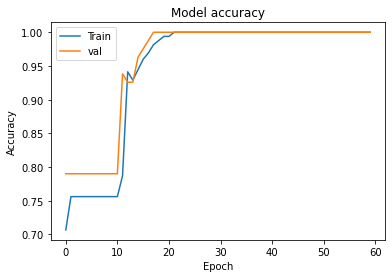

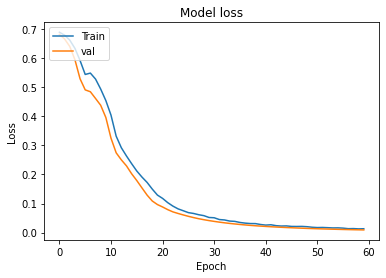

(600, 2622)
(1200, 2622)
(1800, 2622)
(2400, 2622)
(3000, 2622)
(3600, 2622)
(4200, 2622)
(4800, 2622)
(5400, 2622)
(6000, 2622)
(1400, 2622)
(2800, 2622)
(4200, 2622)
(5600, 2622)
(7000, 2622)
Train on 324 samples, validate on 81 samples
Epoch 1/60
324/324 [==============================] - 6s 18ms/step - loss: 0.6888 - accuracy: 0.6574 - val_loss: 0.6775 - val_accuracy: 0.8025
Epoch 2/60
324/324 [==============================] - 1s 3ms/step - loss: 0.6736 - accuracy: 0.7531 - val_loss: 0.6541 - val_accuracy: 0.8025
Epoch 3/60
324/324 [==============================] - 1s 3ms/step - loss: 0.6502 - accuracy: 0.7531 - val_loss: 0.6151 - val_accuracy: 0.8025
Epoch 4/60
324/324 [==============================] - 1s 3ms/step - loss: 0.6120 - accuracy: 0.7531 - val_loss: 0.5508 - val_accuracy: 0.8025
Epoch 5/60
324/324 [==============================] - 1s 3ms/step - loss: 0.5564 - accuracy: 0.7531 - val_loss: 0.4755 - val_accuracy: 0.8025
Epoch 6/60
324/324 [==============================

Epoch 57/60
324/324 [==============================] - 1s 3ms/step - loss: 0.0237 - accuracy: 0.9938 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 58/60
324/324 [==============================] - 1s 3ms/step - loss: 0.0224 - accuracy: 0.9969 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 59/60
324/324 [==============================] - 1s 3ms/step - loss: 0.0196 - accuracy: 0.9969 - val_loss: 0.0167 - val_accuracy: 0.9877
Epoch 60/60
324/324 [==============================] - 1s 4ms/step - loss: 0.0308 - accuracy: 0.9938 - val_loss: 0.0170 - val_accuracy: 0.9877


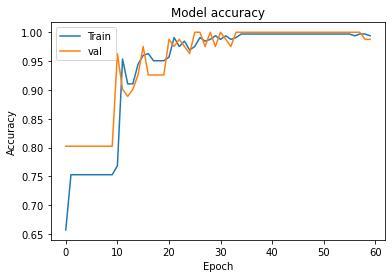

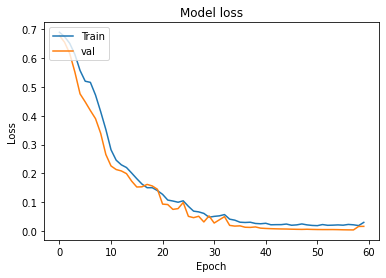

(600, 2622)
(1200, 2622)
(1800, 2622)
(2400, 2622)
(3000, 2622)
(3600, 2622)
(4200, 2622)
(4800, 2622)
(5400, 2622)
(6000, 2622)
(1400, 2622)
(2800, 2622)
(4200, 2622)
(5600, 2622)
(7000, 2622)
Train on 324 samples, validate on 81 samples
Epoch 1/60
324/324 [==============================] - 6s 18ms/step - loss: 0.6892 - accuracy: 0.6265 - val_loss: 0.6753 - val_accuracy: 0.7901
Epoch 2/60
324/324 [==============================] - 1s 3ms/step - loss: 0.6699 - accuracy: 0.7562 - val_loss: 0.6486 - val_accuracy: 0.7901
Epoch 3/60
324/324 [==============================] - 1s 4ms/step - loss: 0.6417 - accuracy: 0.7562 - val_loss: 0.6040 - val_accuracy: 0.7901
Epoch 4/60
324/324 [==============================] - 1s 4ms/step - loss: 0.5974 - accuracy: 0.7562 - val_loss: 0.5396 - val_accuracy: 0.7901
Epoch 5/60
324/324 [==============================] - 1s 4ms/step - loss: 0.5503 - accuracy: 0.7562 - val_loss: 0.4904 - val_accuracy: 0.7901
Epoch 6/60
324/324 [==============================

Epoch 57/60
324/324 [==============================] - 1s 4ms/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 58/60
324/324 [==============================] - 1s 4ms/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 59/60
324/324 [==============================] - 1s 3ms/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 60/60
324/324 [==============================] - 1s 3ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000


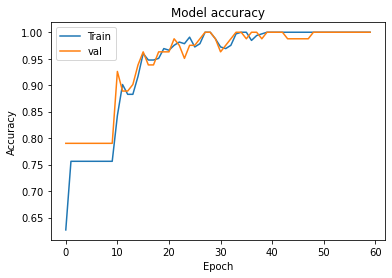

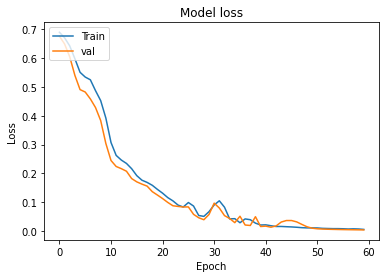

(600, 2622)
(1200, 2622)
(1800, 2622)
(2400, 2622)
(3000, 2622)
(3600, 2622)
(4200, 2622)
(4800, 2622)
(5400, 2622)
(6000, 2622)
(1400, 2622)
(2800, 2622)
(4200, 2622)
(5600, 2622)
(7000, 2622)
Train on 324 samples, validate on 81 samples
Epoch 1/60
324/324 [==============================] - 6s 19ms/step - loss: 0.6857 - accuracy: 0.6975 - val_loss: 0.6644 - val_accuracy: 0.8272
Epoch 2/60
324/324 [==============================] - 1s 3ms/step - loss: 0.6607 - accuracy: 0.7562 - val_loss: 0.6195 - val_accuracy: 0.8272
Epoch 3/60
324/324 [==============================] - 1s 4ms/step - loss: 0.6188 - accuracy: 0.7562 - val_loss: 0.5510 - val_accuracy: 0.8272
Epoch 4/60
324/324 [==============================] - 1s 3ms/step - loss: 0.5672 - accuracy: 0.7562 - val_loss: 0.4737 - val_accuracy: 0.8272
Epoch 5/60
324/324 [==============================] - 1s 3ms/step - loss: 0.5414 - accuracy: 0.7562 - val_loss: 0.4413 - val_accuracy: 0.8272
Epoch 6/60
324/324 [==============================

Epoch 57/60
324/324 [==============================] - 1s 4ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 58/60
324/324 [==============================] - 1s 4ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 59/60
324/324 [==============================] - 1s 4ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 60/60
324/324 [==============================] - 1s 4ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000


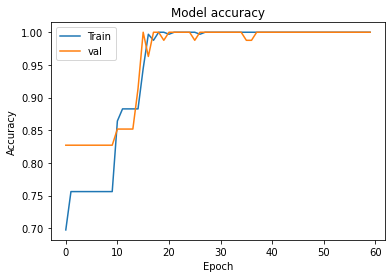

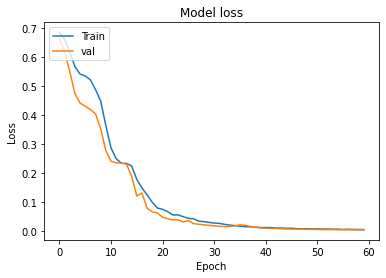

(600, 2622)
(1200, 2622)
(1800, 2622)
(2400, 2622)
(3000, 2622)
(3600, 2622)
(4200, 2622)
(4800, 2622)
(5400, 2622)
(6000, 2622)
(1400, 2622)
(2800, 2622)
(4200, 2622)
(5600, 2622)
(7000, 2622)
Train on 324 samples, validate on 81 samples
Epoch 1/60
324/324 [==============================] - 6s 20ms/step - loss: 0.6865 - accuracy: 0.6883 - val_loss: 0.6662 - val_accuracy: 0.8148
Epoch 2/60
324/324 [==============================] - 1s 3ms/step - loss: 0.6626 - accuracy: 0.7531 - val_loss: 0.6249 - val_accuracy: 0.8148
Epoch 3/60
324/324 [==============================] - 1s 4ms/step - loss: 0.6224 - accuracy: 0.7531 - val_loss: 0.5621 - val_accuracy: 0.8148
Epoch 4/60
324/324 [==============================] - 1s 4ms/step - loss: 0.5737 - accuracy: 0.7531 - val_loss: 0.4867 - val_accuracy: 0.8148
Epoch 5/60
324/324 [==============================] - 1s 4ms/step - loss: 0.5460 - accuracy: 0.7531 - val_loss: 0.4548 - val_accuracy: 0.8148
Epoch 6/60
324/324 [==============================

Epoch 57/60
324/324 [==============================] - 1s 4ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 58/60
324/324 [==============================] - 1s 3ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 59/60
324/324 [==============================] - 1s 3ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 60/60
324/324 [==============================] - 1s 3ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000


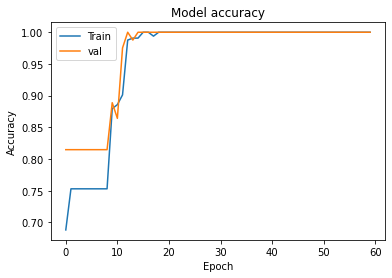

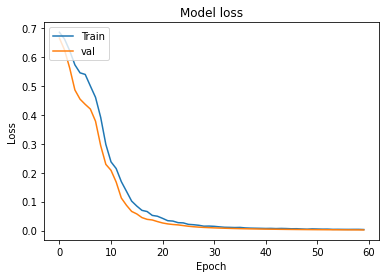

(600, 2622)
(1200, 2622)
(1800, 2622)
(2400, 2622)
(3000, 2622)
(3600, 2622)
(4200, 2622)
(4800, 2622)
(5400, 2622)
(6000, 2622)
(1400, 2622)
(2800, 2622)
(4200, 2622)
(5600, 2622)
(7000, 2622)
Train on 324 samples, validate on 81 samples
Epoch 1/60
324/324 [==============================] - 7s 22ms/step - loss: 0.6891 - accuracy: 0.6944 - val_loss: 0.6759 - val_accuracy: 0.8025
Epoch 2/60
324/324 [==============================] - 1s 3ms/step - loss: 0.6724 - accuracy: 0.7593 - val_loss: 0.6506 - val_accuracy: 0.8025
Epoch 3/60
324/324 [==============================] - 1s 4ms/step - loss: 0.6469 - accuracy: 0.7593 - val_loss: 0.6116 - val_accuracy: 0.8025
Epoch 4/60
324/324 [==============================] - 1s 4ms/step - loss: 0.6130 - accuracy: 0.7593 - val_loss: 0.5598 - val_accuracy: 0.8025
Epoch 5/60
324/324 [==============================] - 1s 4ms/step - loss: 0.5825 - accuracy: 0.7593 - val_loss: 0.5093 - val_accuracy: 0.8025
Epoch 6/60
324/324 [==============================

Epoch 57/60
324/324 [==============================] - 1s 4ms/step - loss: 0.0859 - accuracy: 0.9722 - val_loss: 0.0479 - val_accuracy: 0.9877
Epoch 58/60
324/324 [==============================] - 1s 4ms/step - loss: 0.0466 - accuracy: 0.9907 - val_loss: 0.1281 - val_accuracy: 0.9753
Epoch 59/60
324/324 [==============================] - 1s 4ms/step - loss: 0.0920 - accuracy: 0.9722 - val_loss: 0.0472 - val_accuracy: 0.9877
Epoch 60/60
324/324 [==============================] - 1s 4ms/step - loss: 0.0718 - accuracy: 0.9784 - val_loss: 0.0489 - val_accuracy: 0.9877


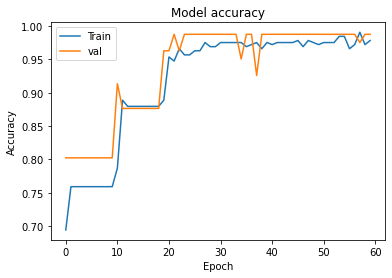

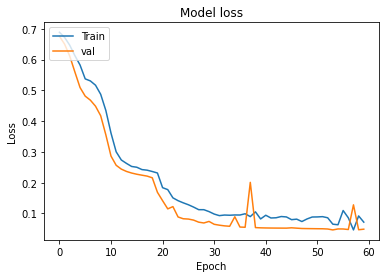

(600, 2622)
(1200, 2622)
(1800, 2622)
(2400, 2622)
(3000, 2622)
(3600, 2622)
(4200, 2622)
(4800, 2622)
(5400, 2622)
(6000, 2622)
(1400, 2622)
(2800, 2622)
(4200, 2622)
(5600, 2622)
(7000, 2622)
Train on 324 samples, validate on 81 samples
Epoch 1/60
324/324 [==============================] - 7s 22ms/step - loss: 0.6882 - accuracy: 0.6790 - val_loss: 0.6721 - val_accuracy: 0.8148
Epoch 2/60
324/324 [==============================] - 1s 4ms/step - loss: 0.6700 - accuracy: 0.7531 - val_loss: 0.6397 - val_accuracy: 0.8148
Epoch 3/60
324/324 [==============================] - 1s 4ms/step - loss: 0.6398 - accuracy: 0.7531 - val_loss: 0.5888 - val_accuracy: 0.8148
Epoch 4/60
324/324 [==============================] - 1s 4ms/step - loss: 0.5965 - accuracy: 0.7531 - val_loss: 0.5214 - val_accuracy: 0.8148
Epoch 5/60
324/324 [==============================] - 1s 4ms/step - loss: 0.5550 - accuracy: 0.7531 - val_loss: 0.4708 - val_accuracy: 0.8148
Epoch 6/60
324/324 [==============================

Epoch 57/60
324/324 [==============================] - 1s 4ms/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 58/60
324/324 [==============================] - 1s 4ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 59/60
324/324 [==============================] - 1s 5ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 60/60
324/324 [==============================] - 1s 4ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000


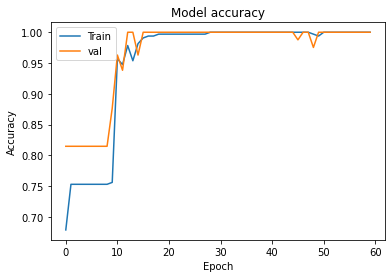

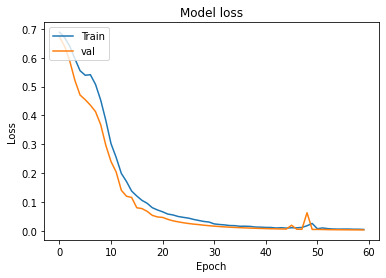

(600, 2622)
(1200, 2622)
(1800, 2622)
(2400, 2622)
(3000, 2622)
(3600, 2622)
(4200, 2622)
(4800, 2622)
(5400, 2622)
(6000, 2622)
(1400, 2622)
(2800, 2622)
(4200, 2622)
(5600, 2622)
(7000, 2622)
Train on 324 samples, validate on 81 samples
Epoch 1/60
324/324 [==============================] - 8s 24ms/step - loss: 0.6875 - accuracy: 0.6944 - val_loss: 0.6721 - val_accuracy: 0.8148
Epoch 2/60
324/324 [==============================] - 1s 4ms/step - loss: 0.6687 - accuracy: 0.7562 - val_loss: 0.6385 - val_accuracy: 0.8148
Epoch 3/60
324/324 [==============================] - 1s 5ms/step - loss: 0.6375 - accuracy: 0.7562 - val_loss: 0.5855 - val_accuracy: 0.8148
Epoch 4/60
324/324 [==============================] - 1s 4ms/step - loss: 0.5887 - accuracy: 0.7562 - val_loss: 0.5047 - val_accuracy: 0.8148
Epoch 5/60
324/324 [==============================] - 1s 5ms/step - loss: 0.5405 - accuracy: 0.7562 - val_loss: 0.4445 - val_accuracy: 0.8148
Epoch 6/60
324/324 [==============================

Epoch 57/60
324/324 [==============================] - 1s 3ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0105 - val_accuracy: 1.0000
Epoch 58/60
324/324 [==============================] - 1s 3ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0106 - val_accuracy: 0.9877
Epoch 59/60
324/324 [==============================] - 1s 3ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0112 - val_accuracy: 0.9877
Epoch 60/60
324/324 [==============================] - 1s 3ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0121 - val_accuracy: 0.9877


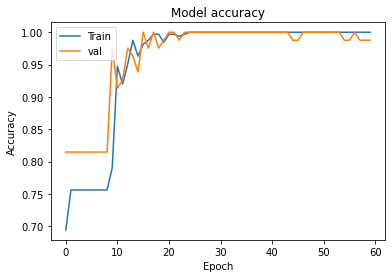

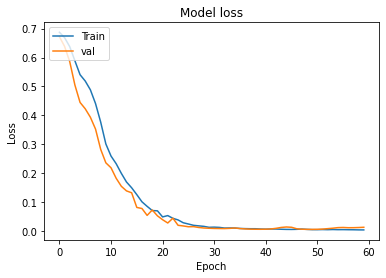

(600, 2622)
(1200, 2622)
(1800, 2622)
(2400, 2622)
(3000, 2622)
(3600, 2622)
(4200, 2622)
(4800, 2622)
(5400, 2622)
(6000, 2622)
(1400, 2622)
(2800, 2622)
(4200, 2622)
(5600, 2622)
(7000, 2622)
Train on 324 samples, validate on 81 samples
Epoch 1/60
324/324 [==============================] - 8s 25ms/step - loss: 0.6869 - accuracy: 0.7500 - val_loss: 0.6733 - val_accuracy: 0.7778
Epoch 2/60
324/324 [==============================] - 1s 5ms/step - loss: 0.6655 - accuracy: 0.7593 - val_loss: 0.6422 - val_accuracy: 0.7778
Epoch 3/60
324/324 [==============================] - 1s 4ms/step - loss: 0.6296 - accuracy: 0.7593 - val_loss: 0.5912 - val_accuracy: 0.7778
Epoch 4/60
324/324 [==============================] - 1s 4ms/step - loss: 0.5753 - accuracy: 0.7593 - val_loss: 0.5225 - val_accuracy: 0.7778
Epoch 5/60
324/324 [==============================] - 1s 4ms/step - loss: 0.5243 - accuracy: 0.7593 - val_loss: 0.4882 - val_accuracy: 0.7778
Epoch 6/60
324/324 [==============================

Epoch 57/60
324/324 [==============================] - 1s 4ms/step - loss: 0.0809 - accuracy: 0.9753 - val_loss: 0.0499 - val_accuracy: 0.9877
Epoch 58/60
324/324 [==============================] - 1s 4ms/step - loss: 0.0817 - accuracy: 0.9753 - val_loss: 0.0499 - val_accuracy: 0.9877
Epoch 59/60
324/324 [==============================] - 1s 4ms/step - loss: 0.0710 - accuracy: 0.9784 - val_loss: 0.0504 - val_accuracy: 0.9877
Epoch 60/60
324/324 [==============================] - 1s 4ms/step - loss: 0.0625 - accuracy: 0.9877 - val_loss: 0.0504 - val_accuracy: 0.9877


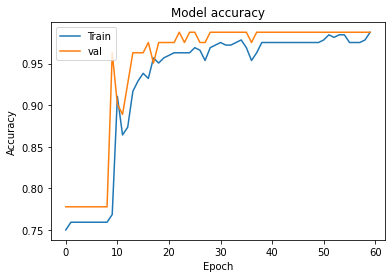

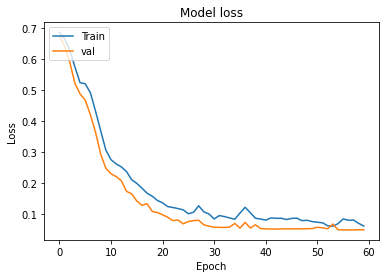

(600, 2622)
(1200, 2622)
(1800, 2622)
(2400, 2622)
(3000, 2622)
(3600, 2622)
(4200, 2622)
(4800, 2622)
(5400, 2622)
(6000, 2622)
(1400, 2622)
(2800, 2622)
(4200, 2622)
(5600, 2622)
(7000, 2622)
Train on 324 samples, validate on 81 samples
Epoch 1/60
324/324 [==============================] - 8s 26ms/step - loss: 0.6901 - accuracy: 0.7068 - val_loss: 0.6819 - val_accuracy: 0.8148
Epoch 2/60
324/324 [==============================] - 1s 4ms/step - loss: 0.6807 - accuracy: 0.7500 - val_loss: 0.6657 - val_accuracy: 0.8148
Epoch 3/60
324/324 [==============================] - 2s 5ms/step - loss: 0.6639 - accuracy: 0.7500 - val_loss: 0.6390 - val_accuracy: 0.8148
Epoch 4/60
324/324 [==============================] - 2s 5ms/step - loss: 0.6403 - accuracy: 0.7500 - val_loss: 0.5929 - val_accuracy: 0.8148
Epoch 5/60
324/324 [==============================] - 2s 5ms/step - loss: 0.6042 - accuracy: 0.7500 - val_loss: 0.5240 - val_accuracy: 0.8148
Epoch 6/60
324/324 [==============================

Epoch 57/60
324/324 [==============================] - 1s 5ms/step - loss: 0.0116 - accuracy: 1.0000 - val_loss: 0.0078 - val_accuracy: 1.0000
Epoch 58/60
324/324 [==============================] - 1s 4ms/step - loss: 0.0121 - accuracy: 1.0000 - val_loss: 0.0075 - val_accuracy: 1.0000
Epoch 59/60
324/324 [==============================] - 2s 5ms/step - loss: 0.0115 - accuracy: 1.0000 - val_loss: 0.0081 - val_accuracy: 1.0000
Epoch 60/60
324/324 [==============================] - 1s 5ms/step - loss: 0.0115 - accuracy: 1.0000 - val_loss: 0.0091 - val_accuracy: 1.0000


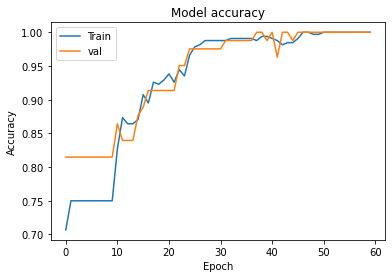

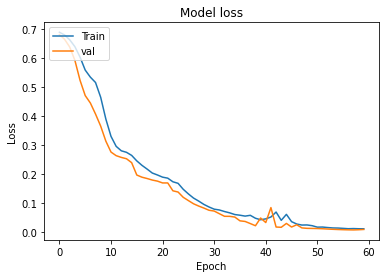

(600, 2622)
(1200, 2622)
(1800, 2622)
(2400, 2622)
(3000, 2622)
(3600, 2622)
(4200, 2622)
(4800, 2622)
(5400, 2622)
(6000, 2622)
(1400, 2622)
(2800, 2622)
(4200, 2622)
(5600, 2622)
(7000, 2622)
Train on 324 samples, validate on 81 samples
Epoch 1/60
324/324 [==============================] - 10s 32ms/step - loss: 0.6868 - accuracy: 0.7006 - val_loss: 0.6693 - val_accuracy: 0.7901
Epoch 2/60
324/324 [==============================] - 1s 4ms/step - loss: 0.6629 - accuracy: 0.7562 - val_loss: 0.6317 - val_accuracy: 0.7901
Epoch 3/60
324/324 [==============================] - 1s 4ms/step - loss: 0.6194 - accuracy: 0.7562 - val_loss: 0.5708 - val_accuracy: 0.7901
Epoch 4/60
324/324 [==============================] - 2s 5ms/step - loss: 0.5687 - accuracy: 0.7562 - val_loss: 0.4996 - val_accuracy: 0.7901
Epoch 5/60
324/324 [==============================] - 1s 4ms/step - loss: 0.5199 - accuracy: 0.7562 - val_loss: 0.4666 - val_accuracy: 0.7901
Epoch 6/60
324/324 [=============================

324/324 [==============================] - 2s 5ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 57/60
324/324 [==============================] - 2s 5ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 58/60
324/324 [==============================] - 2s 5ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 59/60
324/324 [==============================] - 1s 5ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 60/60
324/324 [==============================] - 2s 5ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.0026 - val_accuracy: 1.0000


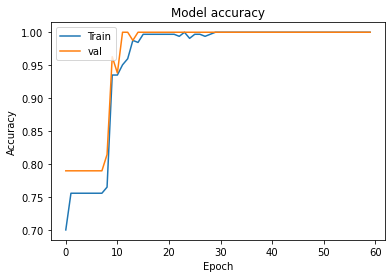

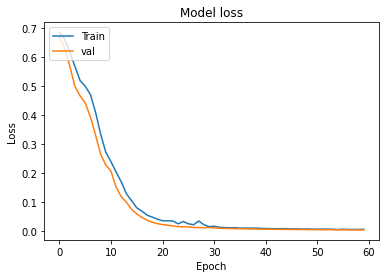

(600, 2622)
(1200, 2622)
(1800, 2622)
(2400, 2622)
(3000, 2622)
(3600, 2622)
(4200, 2622)
(4800, 2622)
(5400, 2622)
(6000, 2622)
(1400, 2622)
(2800, 2622)
(4200, 2622)
(5600, 2622)
(7000, 2622)
Train on 324 samples, validate on 81 samples
Epoch 1/60
324/324 [==============================] - 9s 29ms/step - loss: 0.6875 - accuracy: 0.6914 - val_loss: 0.6697 - val_accuracy: 0.8025
Epoch 2/60
324/324 [==============================] - 1s 4ms/step - loss: 0.6660 - accuracy: 0.7531 - val_loss: 0.6335 - val_accuracy: 0.8025
Epoch 3/60
324/324 [==============================] - 1s 4ms/step - loss: 0.6325 - accuracy: 0.7531 - val_loss: 0.5778 - val_accuracy: 0.8025
Epoch 4/60
324/324 [==============================] - 2s 5ms/step - loss: 0.5847 - accuracy: 0.7531 - val_loss: 0.5093 - val_accuracy: 0.8025
Epoch 5/60
324/324 [==============================] - 2s 5ms/step - loss: 0.5399 - accuracy: 0.7531 - val_loss: 0.4727 - val_accuracy: 0.8025
Epoch 6/60
324/324 [==============================

Epoch 57/60
324/324 [==============================] - 1s 5ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.0552 - val_accuracy: 0.9877
Epoch 58/60
324/324 [==============================] - 2s 5ms/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 0.0555 - val_accuracy: 0.9877
Epoch 59/60
324/324 [==============================] - 2s 5ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.0560 - val_accuracy: 0.9877
Epoch 60/60
324/324 [==============================] - 2s 5ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.0564 - val_accuracy: 0.9877


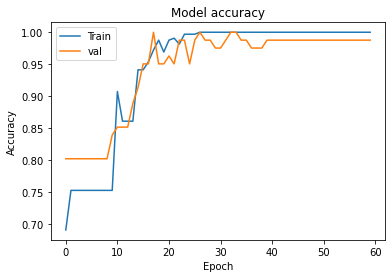

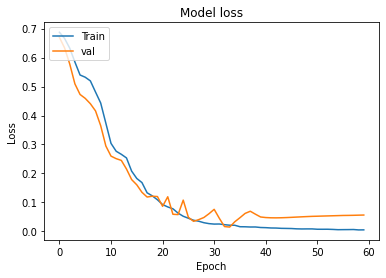

(600, 2622)
(1200, 2622)
(1800, 2622)
(2400, 2622)
(3000, 2622)
(3600, 2622)
(4200, 2622)
(4800, 2622)
(5400, 2622)
(6000, 2622)
(1400, 2622)
(2800, 2622)
(4200, 2622)
(5600, 2622)
(7000, 2622)
Train on 324 samples, validate on 81 samples
Epoch 1/60
324/324 [==============================] - 9s 28ms/step - loss: 0.6869 - accuracy: 0.7160 - val_loss: 0.6691 - val_accuracy: 0.8025
Epoch 2/60
324/324 [==============================] - 1s 3ms/step - loss: 0.6645 - accuracy: 0.7531 - val_loss: 0.6320 - val_accuracy: 0.8025
Epoch 3/60
324/324 [==============================] - 1s 4ms/step - loss: 0.6280 - accuracy: 0.7531 - val_loss: 0.5692 - val_accuracy: 0.8025
Epoch 4/60
324/324 [==============================] - 1s 4ms/step - loss: 0.5711 - accuracy: 0.7531 - val_loss: 0.4836 - val_accuracy: 0.8025
Epoch 5/60
324/324 [==============================] - 2s 5ms/step - loss: 0.5172 - accuracy: 0.7531 - val_loss: 0.4354 - val_accuracy: 0.8025
Epoch 6/60
324/324 [==============================

Epoch 57/60
324/324 [==============================] - 1s 4ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 58/60
324/324 [==============================] - 1s 4ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 59/60
324/324 [==============================] - 2s 5ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 60/60
324/324 [==============================] - 2s 5ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000


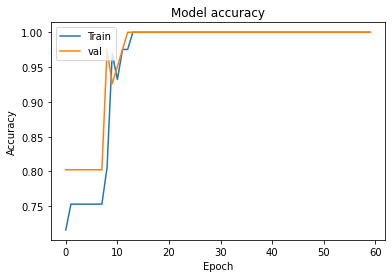

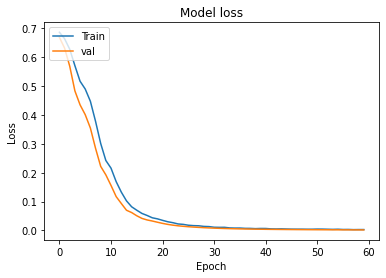

(600, 2622)
(1200, 2622)
(1800, 2622)
(2400, 2622)
(3000, 2622)
(3600, 2622)
(4200, 2622)
(4800, 2622)
(5400, 2622)
(6000, 2622)
(1400, 2622)
(2800, 2622)
(4200, 2622)
(5600, 2622)
(7000, 2622)
Train on 324 samples, validate on 81 samples
Epoch 1/60
324/324 [==============================] - 10s 30ms/step - loss: 0.6889 - accuracy: 0.6759 - val_loss: 0.6775 - val_accuracy: 0.8025
Epoch 2/60
324/324 [==============================] - 1s 4ms/step - loss: 0.6743 - accuracy: 0.7562 - val_loss: 0.6546 - val_accuracy: 0.8025
Epoch 3/60
324/324 [==============================] - 2s 5ms/step - loss: 0.6504 - accuracy: 0.7562 - val_loss: 0.6169 - val_accuracy: 0.8025
Epoch 4/60
324/324 [==============================] - 2s 5ms/step - loss: 0.6154 - accuracy: 0.7562 - val_loss: 0.5576 - val_accuracy: 0.8025
Epoch 5/60
324/324 [==============================] - 2s 5ms/step - loss: 0.5654 - accuracy: 0.7562 - val_loss: 0.4922 - val_accuracy: 0.8025
Epoch 6/60
324/324 [=============================

324/324 [==============================] - 2s 5ms/step - loss: 0.0074 - accuracy: 1.0000 - val_loss: 0.0052 - val_accuracy: 1.0000
Epoch 57/60
324/324 [==============================] - 2s 5ms/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 58/60
324/324 [==============================] - 2s 5ms/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 59/60
324/324 [==============================] - 2s 5ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.0046 - val_accuracy: 1.0000
Epoch 60/60
324/324 [==============================] - 1s 4ms/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.0044 - val_accuracy: 1.0000


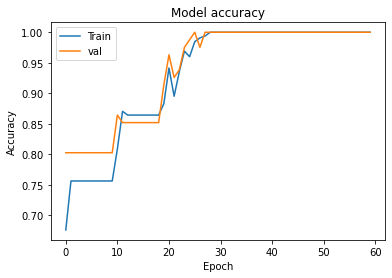

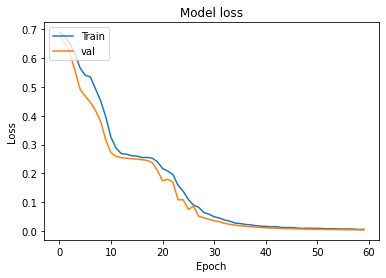

(600, 2622)
(1200, 2622)
(1800, 2622)
(2400, 2622)
(3000, 2622)
(3600, 2622)
(4200, 2622)
(4800, 2622)
(5400, 2622)
(6000, 2622)
(1400, 2622)
(2800, 2622)
(4200, 2622)
(5600, 2622)
(7000, 2622)
Train on 324 samples, validate on 81 samples
Epoch 1/60
324/324 [==============================] - 11s 33ms/step - loss: 0.6885 - accuracy: 0.6605 - val_loss: 0.6733 - val_accuracy: 0.8272
Epoch 2/60
324/324 [==============================] - 2s 5ms/step - loss: 0.6709 - accuracy: 0.7500 - val_loss: 0.6433 - val_accuracy: 0.8272
Epoch 3/60
324/324 [==============================] - 1s 5ms/step - loss: 0.6452 - accuracy: 0.7500 - val_loss: 0.5955 - val_accuracy: 0.8272
Epoch 4/60
324/324 [==============================] - 2s 6ms/step - loss: 0.6049 - accuracy: 0.7500 - val_loss: 0.5131 - val_accuracy: 0.8272
Epoch 5/60
324/324 [==============================] - 2s 6ms/step - loss: 0.5509 - accuracy: 0.7500 - val_loss: 0.4338 - val_accuracy: 0.8272
Epoch 6/60
324/324 [=============================

324/324 [==============================] - 1s 3ms/step - loss: 0.0434 - accuracy: 0.9938 - val_loss: 0.0443 - val_accuracy: 0.9877
Epoch 57/60
324/324 [==============================] - 1s 3ms/step - loss: 0.0450 - accuracy: 0.9907 - val_loss: 0.0468 - val_accuracy: 0.9877
Epoch 58/60
324/324 [==============================] - 1s 3ms/step - loss: 0.0430 - accuracy: 0.9907 - val_loss: 0.0457 - val_accuracy: 0.9877
Epoch 59/60
324/324 [==============================] - 1s 5ms/step - loss: 0.0338 - accuracy: 0.9938 - val_loss: 0.0418 - val_accuracy: 0.9877
Epoch 60/60
324/324 [==============================] - 2s 6ms/step - loss: 0.0224 - accuracy: 1.0000 - val_loss: 0.0454 - val_accuracy: 0.9877


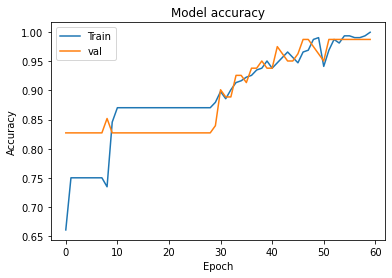

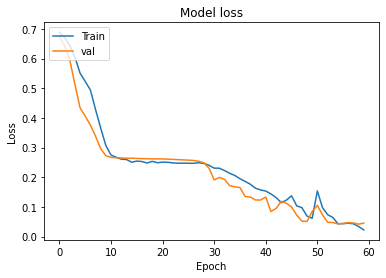

(600, 2622)
(1200, 2622)
(1800, 2622)
(2400, 2622)
(3000, 2622)
(3600, 2622)
(4200, 2622)
(4800, 2622)
(5400, 2622)
(6000, 2622)
(1400, 2622)
(2800, 2622)
(4200, 2622)
(5600, 2622)
(7000, 2622)
Train on 324 samples, validate on 81 samples
Epoch 1/60
324/324 [==============================] - 12s 36ms/step - loss: 0.6863 - accuracy: 0.6852 - val_loss: 0.6690 - val_accuracy: 0.8148
Epoch 2/60
324/324 [==============================] - 2s 5ms/step - loss: 0.6661 - accuracy: 0.7531 - val_loss: 0.6336 - val_accuracy: 0.8148
Epoch 3/60
324/324 [==============================] - 2s 5ms/step - loss: 0.6336 - accuracy: 0.7531 - val_loss: 0.5828 - val_accuracy: 0.8148
Epoch 4/60
324/324 [==============================] - 1s 4ms/step - loss: 0.5922 - accuracy: 0.7531 - val_loss: 0.5230 - val_accuracy: 0.8148
Epoch 5/60
324/324 [==============================] - 1s 3ms/step - loss: 0.5469 - accuracy: 0.7500 - val_loss: 0.4765 - val_accuracy: 0.8148
Epoch 6/60
324/324 [=============================

324/324 [==============================] - 1s 3ms/step - loss: 0.0097 - accuracy: 1.0000 - val_loss: 0.0058 - val_accuracy: 1.0000
Epoch 57/60
324/324 [==============================] - 1s 3ms/step - loss: 0.0099 - accuracy: 1.0000 - val_loss: 0.0057 - val_accuracy: 1.0000
Epoch 58/60
324/324 [==============================] - 1s 3ms/step - loss: 0.0084 - accuracy: 1.0000 - val_loss: 0.0054 - val_accuracy: 1.0000
Epoch 59/60
324/324 [==============================] - 1s 3ms/step - loss: 0.0090 - accuracy: 1.0000 - val_loss: 0.0052 - val_accuracy: 1.0000
Epoch 60/60
324/324 [==============================] - 1s 4ms/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 0.0050 - val_accuracy: 1.0000


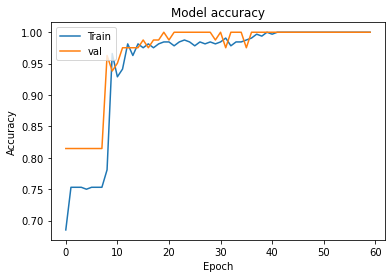

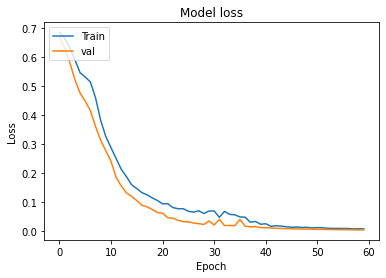

(600, 2622)
(1200, 2622)
(1800, 2622)
(2400, 2622)
(3000, 2622)
(3600, 2622)
(4200, 2622)
(4800, 2622)
(5400, 2622)
(6000, 2622)
(1400, 2622)
(2800, 2622)
(4200, 2622)
(5600, 2622)
(7000, 2622)
Train on 324 samples, validate on 81 samples
Epoch 1/60
324/324 [==============================] - 10s 31ms/step - loss: 0.6885 - accuracy: 0.6852 - val_loss: 0.6756 - val_accuracy: 0.8025
Epoch 2/60
324/324 [==============================] - 1s 3ms/step - loss: 0.6703 - accuracy: 0.7562 - val_loss: 0.6473 - val_accuracy: 0.8025
Epoch 3/60
324/324 [==============================] - 1s 3ms/step - loss: 0.6422 - accuracy: 0.7562 - val_loss: 0.5996 - val_accuracy: 0.8025
Epoch 4/60
324/324 [==============================] - 1s 5ms/step - loss: 0.5964 - accuracy: 0.7562 - val_loss: 0.5235 - val_accuracy: 0.8025
Epoch 5/60
324/324 [==============================] - 1s 3ms/step - loss: 0.5421 - accuracy: 0.7562 - val_loss: 0.4546 - val_accuracy: 0.8025
Epoch 6/60
324/324 [=============================

324/324 [==============================] - 2s 5ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.0052 - val_accuracy: 1.0000
Epoch 57/60
324/324 [==============================] - 1s 4ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 58/60
324/324 [==============================] - 2s 5ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 59/60
324/324 [==============================] - 1s 4ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 60/60
324/324 [==============================] - 1s 5ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 1.0000


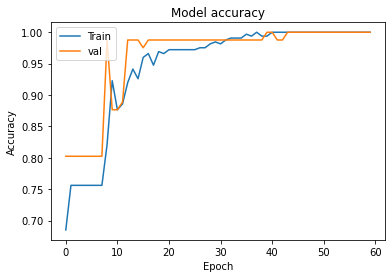

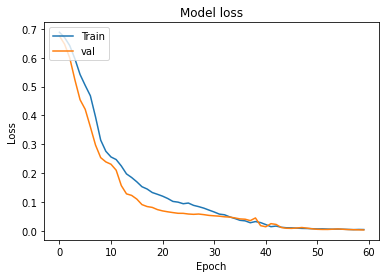

(600, 2622)
(1200, 2622)
(1800, 2622)
(2400, 2622)
(3000, 2622)
(3600, 2622)
(4200, 2622)
(4800, 2622)
(5400, 2622)
(6000, 2622)
(1400, 2622)
(2800, 2622)
(4200, 2622)
(5600, 2622)
(7000, 2622)
Train on 324 samples, validate on 81 samples
Epoch 1/60
324/324 [==============================] - 11s 34ms/step - loss: 0.6863 - accuracy: 0.6728 - val_loss: 0.6656 - val_accuracy: 0.7901
Epoch 2/60
324/324 [==============================] - 1s 4ms/step - loss: 0.6579 - accuracy: 0.7562 - val_loss: 0.6218 - val_accuracy: 0.7901
Epoch 3/60
324/324 [==============================] - 1s 4ms/step - loss: 0.6123 - accuracy: 0.7562 - val_loss: 0.5533 - val_accuracy: 0.7901
Epoch 4/60
324/324 [==============================] - 1s 4ms/step - loss: 0.5552 - accuracy: 0.7562 - val_loss: 0.4879 - val_accuracy: 0.7901
Epoch 5/60
324/324 [==============================] - 1s 4ms/step - loss: 0.5328 - accuracy: 0.7562 - val_loss: 0.4642 - val_accuracy: 0.7901
Epoch 6/60
324/324 [=============================

324/324 [==============================] - 2s 5ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 0.0340 - val_accuracy: 0.9877
Epoch 57/60
324/324 [==============================] - 1s 4ms/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.0285 - val_accuracy: 0.9877
Epoch 58/60
324/324 [==============================] - 2s 5ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.0219 - val_accuracy: 0.9877
Epoch 59/60
324/324 [==============================] - 1s 4ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.0124 - val_accuracy: 1.0000
Epoch 60/60
324/324 [==============================] - 1s 5ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.0084 - val_accuracy: 1.0000


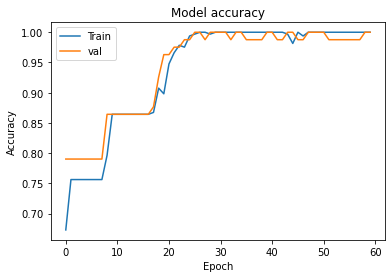

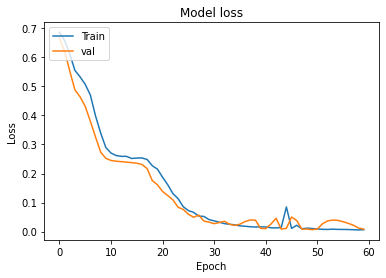

(600, 2622)
(1200, 2622)
(1800, 2622)
(2400, 2622)
(3000, 2622)
(3600, 2622)
(4200, 2622)
(4800, 2622)
(5400, 2622)
(6000, 2622)
(1400, 2622)
(2800, 2622)
(4200, 2622)
(5600, 2622)
(7000, 2622)
Train on 324 samples, validate on 81 samples
Epoch 1/60
324/324 [==============================] - 13s 39ms/step - loss: 0.6870 - accuracy: 0.7346 - val_loss: 0.6708 - val_accuracy: 0.7901
Epoch 2/60
324/324 [==============================] - 2s 5ms/step - loss: 0.6630 - accuracy: 0.7593 - val_loss: 0.6359 - val_accuracy: 0.7901
Epoch 3/60
324/324 [==============================] - 1s 4ms/step - loss: 0.6275 - accuracy: 0.7593 - val_loss: 0.5787 - val_accuracy: 0.7901
Epoch 4/60
324/324 [==============================] - 1s 3ms/step - loss: 0.5709 - accuracy: 0.7593 - val_loss: 0.5080 - val_accuracy: 0.7901
Epoch 5/60
324/324 [==============================] - 1s 4ms/step - loss: 0.5269 - accuracy: 0.7593 - val_loss: 0.4825 - val_accuracy: 0.7901
Epoch 6/60
324/324 [=============================

324/324 [==============================] - 1s 4ms/step - loss: 0.0074 - accuracy: 1.0000 - val_loss: 0.0418 - val_accuracy: 0.9877
Epoch 57/60
324/324 [==============================] - 1s 3ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.0439 - val_accuracy: 0.9877
Epoch 58/60
324/324 [==============================] - 1s 3ms/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.0479 - val_accuracy: 0.9877
Epoch 59/60
324/324 [==============================] - 2s 5ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 0.0478 - val_accuracy: 0.9877
Epoch 60/60
324/324 [==============================] - 1s 3ms/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.0442 - val_accuracy: 0.9877


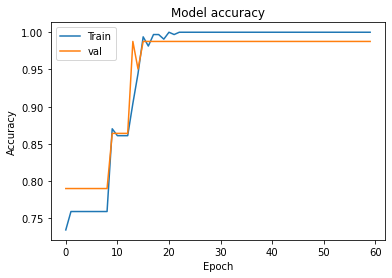

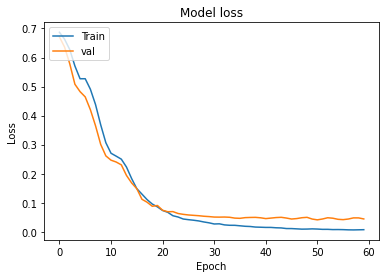

(600, 2622)
(1200, 2622)
(1800, 2622)
(2400, 2622)
(3000, 2622)
(3600, 2622)
(4200, 2622)
(4800, 2622)
(5400, 2622)
(6000, 2622)
(1400, 2622)
(2800, 2622)
(4200, 2622)
(5600, 2622)
(7000, 2622)
Train on 324 samples, validate on 81 samples
Epoch 1/60
324/324 [==============================] - 13s 39ms/step - loss: 0.6867 - accuracy: 0.6975 - val_loss: 0.6711 - val_accuracy: 0.7901
Epoch 2/60
324/324 [==============================] - 1s 4ms/step - loss: 0.6640 - accuracy: 0.7562 - val_loss: 0.6366 - val_accuracy: 0.7901
Epoch 3/60
324/324 [==============================] - 2s 5ms/step - loss: 0.6292 - accuracy: 0.7562 - val_loss: 0.5795 - val_accuracy: 0.7901
Epoch 4/60
324/324 [==============================] - 1s 4ms/step - loss: 0.5663 - accuracy: 0.7562 - val_loss: 0.4988 - val_accuracy: 0.7901
Epoch 5/60
324/324 [==============================] - 1s 3ms/step - loss: 0.5235 - accuracy: 0.7562 - val_loss: 0.4562 - val_accuracy: 0.7901
Epoch 6/60
324/324 [=============================

324/324 [==============================] - 2s 5ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 57/60
324/324 [==============================] - 1s 4ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 58/60
324/324 [==============================] - 1s 4ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 59/60
324/324 [==============================] - 1s 4ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 60/60
324/324 [==============================] - 2s 6ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 1.0000


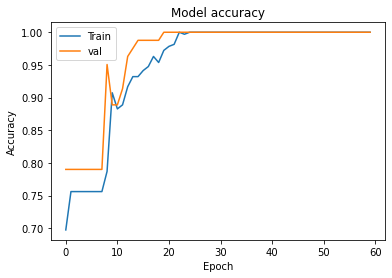

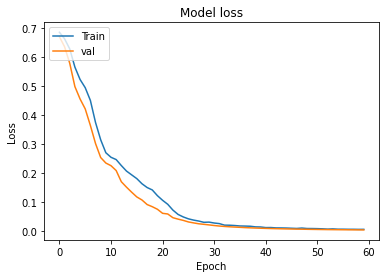

(600, 2622)
(1200, 2622)
(1800, 2622)
(2400, 2622)
(3000, 2622)
(3600, 2622)
(4200, 2622)
(4800, 2622)
(5400, 2622)
(6000, 2622)
(1400, 2622)
(2800, 2622)
(4200, 2622)
(5600, 2622)
(7000, 2622)
Train on 324 samples, validate on 81 samples
Epoch 1/60
324/324 [==============================] - 14s 44ms/step - loss: 0.6880 - accuracy: 0.7191 - val_loss: 0.6714 - val_accuracy: 0.8272
Epoch 2/60
324/324 [==============================] - 1s 4ms/step - loss: 0.6687 - accuracy: 0.7500 - val_loss: 0.6376 - val_accuracy: 0.8272
Epoch 3/60
324/324 [==============================] - 2s 6ms/step - loss: 0.6370 - accuracy: 0.7500 - val_loss: 0.5832 - val_accuracy: 0.8272
Epoch 4/60
324/324 [==============================] - 1s 5ms/step - loss: 0.5895 - accuracy: 0.7500 - val_loss: 0.5035 - val_accuracy: 0.8272
Epoch 5/60
324/324 [==============================] - 1s 3ms/step - loss: 0.5440 - accuracy: 0.7500 - val_loss: 0.4387 - val_accuracy: 0.8272
Epoch 6/60
324/324 [=============================

324/324 [==============================] - 2s 6ms/step - loss: 0.0924 - accuracy: 0.9753 - val_loss: 0.0482 - val_accuracy: 0.9877
Epoch 57/60
324/324 [==============================] - 2s 6ms/step - loss: 0.0873 - accuracy: 0.9753 - val_loss: 0.0481 - val_accuracy: 0.9877
Epoch 58/60
324/324 [==============================] - 1s 3ms/step - loss: 0.0878 - accuracy: 0.9753 - val_loss: 0.0480 - val_accuracy: 0.9877
Epoch 59/60
324/324 [==============================] - 2s 5ms/step - loss: 0.0854 - accuracy: 0.9753 - val_loss: 0.0480 - val_accuracy: 0.9877
Epoch 60/60
324/324 [==============================] - 1s 4ms/step - loss: 0.0810 - accuracy: 0.9753 - val_loss: 0.0479 - val_accuracy: 0.9877


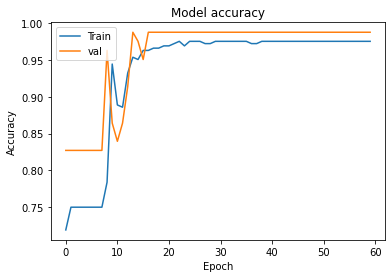

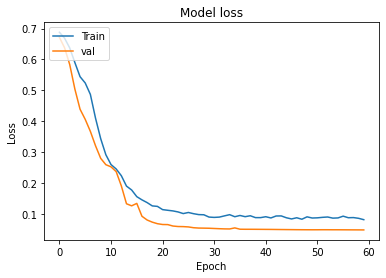

(600, 2622)
(1200, 2622)
(1800, 2622)
(2400, 2622)
(3000, 2622)
(3600, 2622)
(4200, 2622)
(4800, 2622)
(5400, 2622)
(6000, 2622)
(1400, 2622)
(2800, 2622)
(4200, 2622)
(5600, 2622)
(7000, 2622)
Train on 324 samples, validate on 81 samples
Epoch 1/60
324/324 [==============================] - 13s 39ms/step - loss: 0.6898 - accuracy: 0.6327 - val_loss: 0.6785 - val_accuracy: 0.8148
Epoch 2/60
324/324 [==============================] - 1s 3ms/step - loss: 0.6756 - accuracy: 0.7531 - val_loss: 0.6569 - val_accuracy: 0.8148
Epoch 3/60
324/324 [==============================] - 2s 5ms/step - loss: 0.6544 - accuracy: 0.7531 - val_loss: 0.6213 - val_accuracy: 0.8148
Epoch 4/60
324/324 [==============================] - 1s 3ms/step - loss: 0.6187 - accuracy: 0.7531 - val_loss: 0.5624 - val_accuracy: 0.8148
Epoch 5/60
324/324 [==============================] - 1s 3ms/step - loss: 0.5711 - accuracy: 0.7531 - val_loss: 0.4824 - val_accuracy: 0.8148
Epoch 6/60
324/324 [=============================

324/324 [==============================] - 2s 5ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 57/60
324/324 [==============================] - 2s 6ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 58/60
324/324 [==============================] - 1s 3ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 59/60
324/324 [==============================] - 1s 4ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 60/60
324/324 [==============================] - 1s 4ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 1.0000


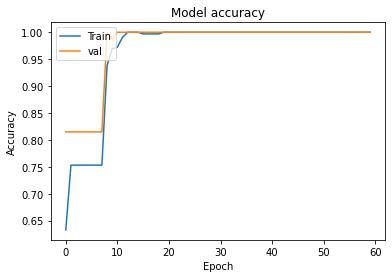

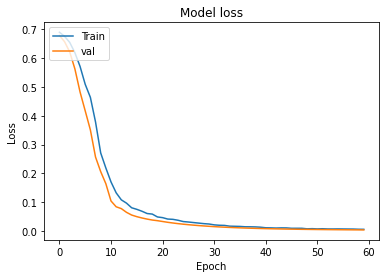

(600, 2622)
(1200, 2622)
(1800, 2622)
(2400, 2622)
(3000, 2622)
(3600, 2622)
(4200, 2622)
(4800, 2622)
(5400, 2622)
(6000, 2622)
(1400, 2622)
(2800, 2622)
(4200, 2622)
(5600, 2622)
(7000, 2622)
Train on 324 samples, validate on 81 samples
Epoch 1/60
324/324 [==============================] - 13s 40ms/step - loss: 0.6879 - accuracy: 0.6975 - val_loss: 0.6758 - val_accuracy: 0.7901
Epoch 2/60
324/324 [==============================] - 2s 5ms/step - loss: 0.6708 - accuracy: 0.7562 - val_loss: 0.6490 - val_accuracy: 0.7901
Epoch 3/60
324/324 [==============================] - 1s 3ms/step - loss: 0.6436 - accuracy: 0.7562 - val_loss: 0.6050 - val_accuracy: 0.7901
Epoch 4/60
324/324 [==============================] - 1s 4ms/step - loss: 0.5982 - accuracy: 0.7562 - val_loss: 0.5388 - val_accuracy: 0.7901
Epoch 5/60
324/324 [==============================] - 1s 3ms/step - loss: 0.5497 - accuracy: 0.7562 - val_loss: 0.4788 - val_accuracy: 0.7901
Epoch 6/60
324/324 [=============================

324/324 [==============================] - 1s 4ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 57/60
324/324 [==============================] - 2s 5ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 58/60
324/324 [==============================] - 1s 4ms/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 59/60
324/324 [==============================] - 1s 4ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 60/60
324/324 [==============================] - 2s 6ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 1.0000


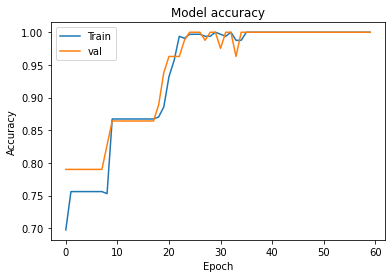

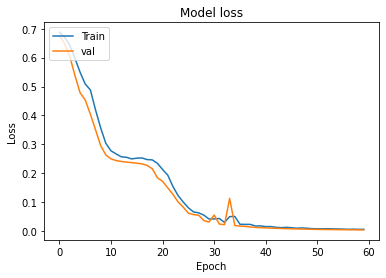

(600, 2622)
(1200, 2622)
(1800, 2622)
(2400, 2622)
(3000, 2622)
(3600, 2622)
(4200, 2622)
(4800, 2622)
(5400, 2622)
(6000, 2622)
(1400, 2622)
(2800, 2622)
(4200, 2622)
(5600, 2622)
(7000, 2622)
Train on 324 samples, validate on 81 samples
Epoch 1/60
324/324 [==============================] - 15s 45ms/step - loss: 0.6870 - accuracy: 0.7253 - val_loss: 0.6721 - val_accuracy: 0.7901
Epoch 2/60
324/324 [==============================] - 1s 4ms/step - loss: 0.6649 - accuracy: 0.7593 - val_loss: 0.6373 - val_accuracy: 0.7901
Epoch 3/60
324/324 [==============================] - 2s 5ms/step - loss: 0.6275 - accuracy: 0.7593 - val_loss: 0.5773 - val_accuracy: 0.7901
Epoch 4/60
324/324 [==============================] - 1s 4ms/step - loss: 0.5682 - accuracy: 0.7593 - val_loss: 0.4955 - val_accuracy: 0.7901
Epoch 5/60
324/324 [==============================] - 1s 4ms/step - loss: 0.5149 - accuracy: 0.7593 - val_loss: 0.4538 - val_accuracy: 0.7901
Epoch 6/60
324/324 [=============================

324/324 [==============================] - 1s 4ms/step - loss: 0.0116 - accuracy: 1.0000 - val_loss: 0.0819 - val_accuracy: 0.9753
Epoch 57/60
324/324 [==============================] - 1s 4ms/step - loss: 0.0112 - accuracy: 1.0000 - val_loss: 0.0806 - val_accuracy: 0.9753
Epoch 58/60
324/324 [==============================] - 1s 5ms/step - loss: 0.0097 - accuracy: 1.0000 - val_loss: 0.0758 - val_accuracy: 0.9753
Epoch 59/60
324/324 [==============================] - 2s 5ms/step - loss: 0.0097 - accuracy: 1.0000 - val_loss: 0.0710 - val_accuracy: 0.9753
Epoch 60/60
324/324 [==============================] - 1s 4ms/step - loss: 0.0090 - accuracy: 1.0000 - val_loss: 0.0741 - val_accuracy: 0.9753


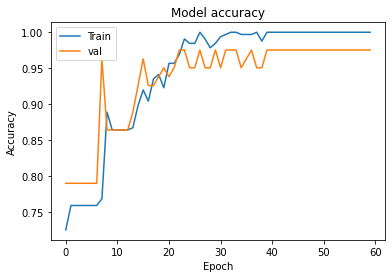

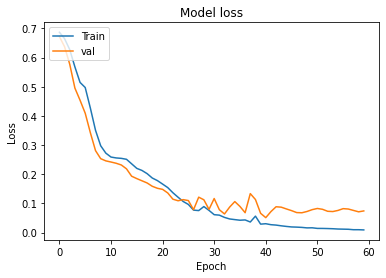

(600, 2622)
(1200, 2622)
(1800, 2622)
(2400, 2622)
(3000, 2622)
(3600, 2622)
(4200, 2622)
(4800, 2622)
(5400, 2622)
(6000, 2622)
(1400, 2622)
(2800, 2622)
(4200, 2622)
(5600, 2622)
(7000, 2622)
Train on 324 samples, validate on 81 samples
Epoch 1/60
324/324 [==============================] - 15s 47ms/step - loss: 0.6884 - accuracy: 0.6852 - val_loss: 0.6730 - val_accuracy: 0.8148
Epoch 2/60
324/324 [==============================] - 1s 4ms/step - loss: 0.6695 - accuracy: 0.7531 - val_loss: 0.6413 - val_accuracy: 0.8148
Epoch 3/60
324/324 [==============================] - 1s 4ms/step - loss: 0.6379 - accuracy: 0.7531 - val_loss: 0.5889 - val_accuracy: 0.8148
Epoch 4/60
324/324 [==============================] - 1s 4ms/step - loss: 0.5883 - accuracy: 0.7531 - val_loss: 0.5110 - val_accuracy: 0.8148
Epoch 5/60
324/324 [==============================] - 1s 4ms/step - loss: 0.5375 - accuracy: 0.7531 - val_loss: 0.4442 - val_accuracy: 0.8148
Epoch 6/60
324/324 [=============================

324/324 [==============================] - 1s 4ms/step - loss: 0.0095 - accuracy: 1.0000 - val_loss: 0.0059 - val_accuracy: 1.0000
Epoch 57/60
324/324 [==============================] - 1s 4ms/step - loss: 0.0087 - accuracy: 1.0000 - val_loss: 0.0061 - val_accuracy: 1.0000
Epoch 58/60
324/324 [==============================] - 2s 5ms/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 0.0052 - val_accuracy: 1.0000
Epoch 59/60
324/324 [==============================] - 1s 5ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 60/60
324/324 [==============================] - 2s 5ms/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.0047 - val_accuracy: 1.0000


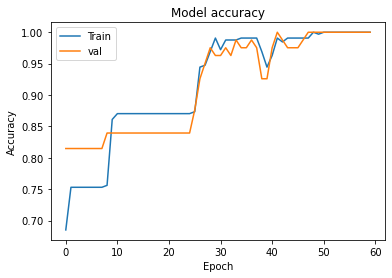

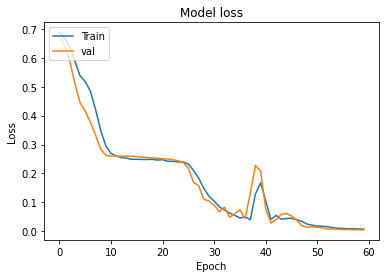

(600, 2622)
(1200, 2622)
(1800, 2622)
(2400, 2622)
(3000, 2622)
(3600, 2622)
(4200, 2622)
(4800, 2622)
(5400, 2622)
(6000, 2622)
(1400, 2622)
(2800, 2622)
(4200, 2622)
(5600, 2622)
(7000, 2622)
Train on 324 samples, validate on 81 samples
Epoch 1/60
324/324 [==============================] - 17s 52ms/step - loss: 0.6879 - accuracy: 0.7160 - val_loss: 0.6732 - val_accuracy: 0.8025
Epoch 2/60
324/324 [==============================] - 2s 5ms/step - loss: 0.6674 - accuracy: 0.7593 - val_loss: 0.6437 - val_accuracy: 0.8025
Epoch 3/60
324/324 [==============================] - 1s 5ms/step - loss: 0.6410 - accuracy: 0.7593 - val_loss: 0.5980 - val_accuracy: 0.8025
Epoch 4/60
324/324 [==============================] - 1s 4ms/step - loss: 0.5943 - accuracy: 0.7593 - val_loss: 0.5329 - val_accuracy: 0.8025
Epoch 5/60
324/324 [==============================] - 1s 4ms/step - loss: 0.5472 - accuracy: 0.7593 - val_loss: 0.4711 - val_accuracy: 0.8025
Epoch 6/60
324/324 [=============================

324/324 [==============================] - 1s 4ms/step - loss: 0.0762 - accuracy: 0.9784 - val_loss: 0.0947 - val_accuracy: 0.9753
Epoch 57/60
324/324 [==============================] - 2s 5ms/step - loss: 0.0771 - accuracy: 0.9753 - val_loss: 0.0824 - val_accuracy: 0.9753
Epoch 58/60
324/324 [==============================] - 2s 5ms/step - loss: 0.0649 - accuracy: 0.9815 - val_loss: 0.0825 - val_accuracy: 0.9753
Epoch 59/60
324/324 [==============================] - 1s 5ms/step - loss: 0.0934 - accuracy: 0.9722 - val_loss: 0.1893 - val_accuracy: 0.9259
Epoch 60/60
324/324 [==============================] - 2s 5ms/step - loss: 0.1679 - accuracy: 0.9352 - val_loss: 0.1339 - val_accuracy: 0.9506


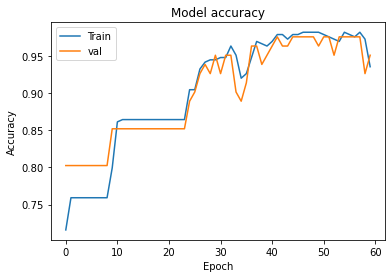

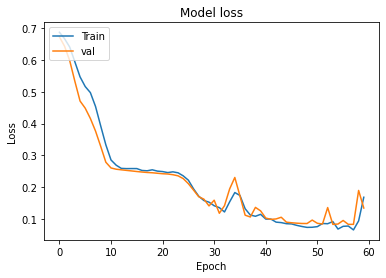

(600, 2622)
(1200, 2622)
(1800, 2622)
(2400, 2622)
(3000, 2622)
(3600, 2622)
(4200, 2622)
(4800, 2622)
(5400, 2622)
(6000, 2622)
(1400, 2622)
(2800, 2622)
(4200, 2622)
(5600, 2622)
(7000, 2622)
Train on 324 samples, validate on 81 samples
Epoch 1/60
324/324 [==============================] - 17s 53ms/step - loss: 0.6885 - accuracy: 0.7006 - val_loss: 0.6761 - val_accuracy: 0.7778
Epoch 2/60
324/324 [==============================] - 2s 6ms/step - loss: 0.6709 - accuracy: 0.7593 - val_loss: 0.6507 - val_accuracy: 0.7778
Epoch 3/60
324/324 [==============================] - 2s 5ms/step - loss: 0.6423 - accuracy: 0.7593 - val_loss: 0.6104 - val_accuracy: 0.7778
Epoch 4/60
324/324 [==============================] - 2s 5ms/step - loss: 0.6001 - accuracy: 0.7593 - val_loss: 0.5504 - val_accuracy: 0.7778
Epoch 5/60
324/324 [==============================] - 2s 7ms/step - loss: 0.5523 - accuracy: 0.7593 - val_loss: 0.5027 - val_accuracy: 0.7778
Epoch 6/60
324/324 [=============================

324/324 [==============================] - 2s 7ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.0610 - val_accuracy: 0.9877
Epoch 57/60
324/324 [==============================] - 2s 6ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.0617 - val_accuracy: 0.9877
Epoch 58/60
324/324 [==============================] - 2s 5ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.0624 - val_accuracy: 0.9877
Epoch 59/60
324/324 [==============================] - 1s 5ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0630 - val_accuracy: 0.9877
Epoch 60/60
324/324 [==============================] - 1s 4ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0636 - val_accuracy: 0.9877


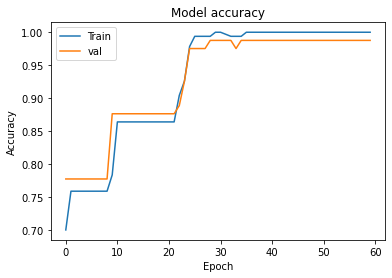

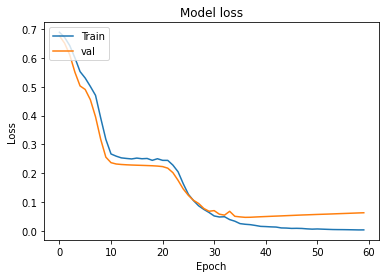

(600, 2622)
(1200, 2622)
(1800, 2622)
(2400, 2622)
(3000, 2622)
(3600, 2622)
(4200, 2622)
(4800, 2622)
(5400, 2622)
(6000, 2622)


In [3]:
accuracy_list = []
y_pred_list=[]
y_test_final_list=[]
for wordID in range(35):

    #Set the appropriate word as positive and rest as negative

    #create training set and testing set

    X_train = concatenator()
    X_train=X_train.reshape(350,20,2622)
    X_train_oversampled = oversample(X_train,wordID)

    y_train = labeller(wordID)

    X_train,X_test,y_train,Y_test=train_test_split(X_train_oversampled, y_train, test_size=0.1,random_state=42)

    #Train the model for 60 iterations 

    model=trainer(X_train,y_train)

    #Test it for the test set(including 3 other people)
    testing_set=concatenator_t()
    testing_set=testing_set.reshape(300,20,2622)
    #y_pred=model.predict_proba(X_test_final)>0.7
    X_test_final=np.concatenate((X_test,testing_set))
    y_pred_proba=model.predict_proba(X_test_final)
    y_pred=model.predict_proba(X_test_final)>0.7
    y_test_final=np.concatenate((Y_test,np.zeros((300,1))))
    from sklearn.metrics import accuracy_score
    accuracy = accuracy_score(y_test_final,y_pred)

    #record accuracy for that person and word

    accuracy_list.append(accuracy)
    if wordID==0:
        y_pred_list=y_pred_proba
        y_test_final_list=y_test_final
    else:
        y_pred_list=np.vstack((y_pred_list,y_pred_proba))
        y_test_final_list=np.vstack((y_test_final_list,y_test_final))

In [4]:
print(len(accuracy_list))
print(y_pred_list.shape)
print(y_test_final_list.shape)

35
(12075, 1)
(12075, 1)


In [5]:
with open("accuracy.txt", 'w') as f:
    for s in accuracy_list:
        f.write(str(s) + '\n')

In [6]:
with open("predictions.txt", 'w') as f:
    for s in y_pred_list:
        f.write(str(s) + '\n')

In [7]:
with open("true_labels.txt", 'w') as f:
    for s in y_test_final_list:
        f.write(str(s) + '\n')

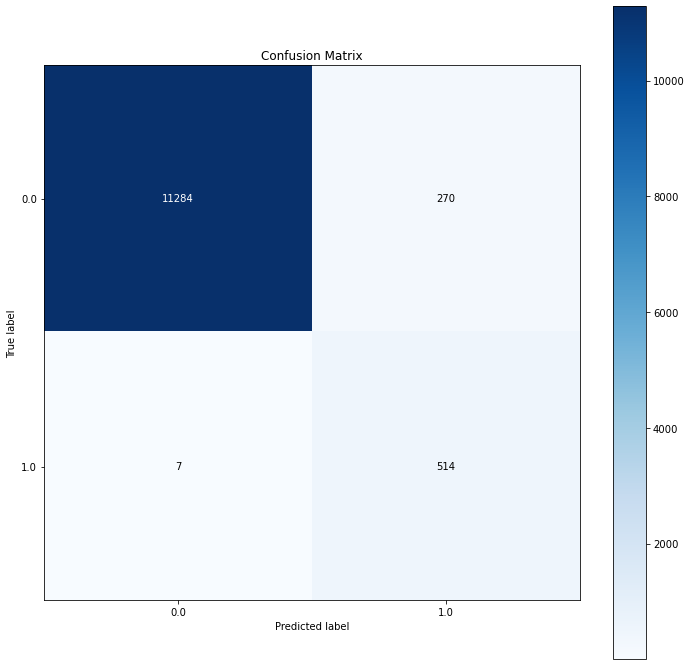

In [35]:
import scikitplot as skplt
y_pred_binary=y_pred_list>0.9
skplt.metrics.plot_confusion_matrix(
    y_test_final_list, 
    y_pred_binary,
    figsize=(12,12))

In [12]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [13]:
lr_auc = roc_auc_score(y_test_final_list,y_pred_list)
print(lr_auc)

0.9897693115561511


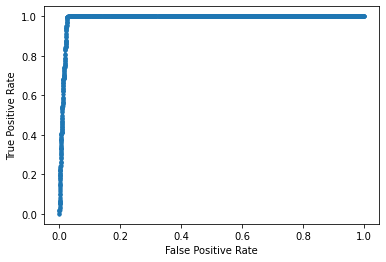

In [14]:
lr_fpr, lr_tpr, _ = roc_curve(y_test_final_list, y_pred_list)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Cerberus')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [15]:
total=0
for s in accuracy_list:
    total=total+s
avg=total/35
print(avg)

0.9747412008281575


In [19]:
i=0
j=0
for s in accuracy_list:
    if s>=0.95:
        i=i+1
    #elif s>=0.95:
     #   j=j+1
#print(j/35)
print(i/35)

0.8285714285714286
